# Pré-Processamento

## Importando bibliotecas

In [1]:
# Importação do módulo 're' para manipulação de expressões regulares
import re

# Importação da classe 'WordCloud' do pacote 'wordcloud' para visualização de nuvens de palavras
from wordcloud import WordCloud

# Importação do módulo 'initialize' e 'compose' da biblioteca 'hydra' para gerenciamento flexível de configurações
from hydra import initialize, compose

# Importação de módulos específicos do pacote 'nltk' (Natural Language Toolkit)
import nltk

# Importação da classe 'PorterStemmer' do pacote 'nltk' para stemming (redução a radical) de palavras
from nltk.stem import PorterStemmer

# Importação da classe 'WordNetLemmatizer' do pacote 'nltk' para lematização (redução a forma base) de palavras
from nltk.stem import WordNetLemmatizer

# Download de recursos adicionais do 'nltk' necessários para tokenização, stopwords e lematização
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/elvinmatheus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/elvinmatheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/elvinmatheus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

re (Expressões Regulares): O módulo re é utilizado para manipulação de expressões regulares em Python. Expressões regulares são padrões utilizados para buscar e manipular texto. Neste contexto, pode ser usado para pré-processamento de texto.

WordCloud: A classe WordCloud do pacote wordcloud é utilizada para criar visualizações de nuvens de palavras a partir de um conjunto de texto. É uma ferramenta comum em análise de texto para destacar as palavras mais frequentes.

initialize e compose (Hydra): Esses são módulos específicos do Hydra, um framework de configuração flexível. Eles são usados para inicializar o Hydra e compor configurações, permitindo uma gestão eficiente e hierárquica das configurações do projeto.

nltk (Natural Language Toolkit): O NLTK é uma biblioteca amplamente usada para processamento de linguagem natural em Python. Oferece diversos recursos, incluindo tokenização, stemming, lematização e muito mais.

PorterStemmer e WordNetLemmatizer (NLTK): Essas classes são utilizadas para realizar operações de stemming (redução a radical) e lematização (redução a forma base) em palavras, respectivamente. São técnicas comuns em pré-processamento de texto.

nltk.download('punkt'), nltk.download('stopwords'), nltk.download('wordnet'): Essas linhas fazem download de recursos adicionais do NLTK, como modelos de tokenização, lista de stopwords e recursos do WordNet, que são necessários para certas operações de processamento de linguagem natural.

In [2]:
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='main')
    
df = pd.read_csv(f"../{cfg.data.interim}")

## Pré-processamento do texto

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
# Alterar capitalizacao para minusculo
def minusculo(text):
    
    return text.lower()

df['cleaned_text'] = df['Sentence'].apply(minusculo)

In [7]:
#Remover Pontuação
def remover_pontuacao(texto):
    return re.sub(r'[^\w\s]', '', texto)

df['cleaned_text'] = df['cleaned_text'].apply(remover_pontuacao)

In [8]:
# Remover números
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

df['cleaned_text'] = df['cleaned_text'].apply(remover_numeros)

In [9]:
# Remover espaços
def remover_espacos(text):
    return text.replace("\n","").replace("\r","")

df['cleaned_text'] = df['cleaned_text'].apply(remover_espacos)

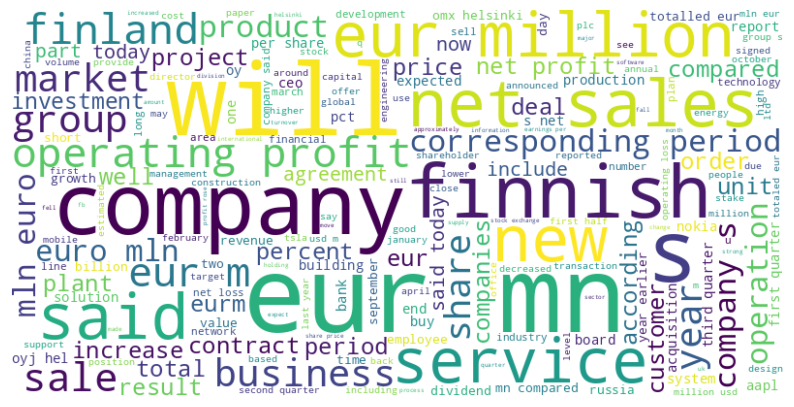

In [11]:
# Juntar as frases para criar uma string única
all_text = ' '.join(df.cleaned_text)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(all_text)

# Exibir a imagem da nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Codificar a coluna Sentiment
def codificar_sentimentos(df):
    df["encoded_sentiment"]=df["Sentiment"].map({"positive":1,"negative":0,"neutral":2})
    df['encoded_sentiment']=df['encoded_sentiment'].astype(int)
    
    return df[df['encoded_sentiment'] != 2]

df = codificar_sentimentos(df)

Essa função realiza algumas operações no DataFrame para codificar os sentimentos de acordo com um dicionário de mapeamento. A codificação é feita adicionando uma nova coluna chamada 'encoded_sentiment' ao DataFrame, onde os sentimentos "positive" são mapeados para 1, "negative" para 0 e "neutral" para 2.

Em seguida, a função converte os valores dessa nova coluna para o tipo inteiro. Posteriormente, a função retorna um novo DataFrame que exclui as linhas onde o sentimento é considerado "neutro" (codificado como 2).

In [14]:
# Stematizar palavras
def stem_words(text):
    ps = PorterStemmer()
    stemmed_words = []
    for word in text.split():
        stemmed_words.append(ps.stem(word))

    return " ".join(stemmed_words)

df['stematized_text'] = df['cleaned_text'].apply(stem_words)

A stematização é um processo de redução de palavras à sua forma base ou radical, removendo sufixos ou prefixos. O resultado (o "stem") pode não ser uma palavra real, mas representa a forma comum de várias palavras relacionadas. Por exemplo, as palavras "running", "runner" e "ran" podem ser reduzidas ao mesmo stem "run".

In [15]:
# Lematizar palavras
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in text.split():
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return " ".join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_words)

A lematização é um processo mais avançado em comparação com a stematização. Ela envolve a redução de palavras à sua forma base ou lema, considerando a semântica e a classe gramatical da palavra. O resultado (o "lema") é uma palavra real, presente no dicionário, que representa a forma base da palavra. Por exemplo, as palavras "am", "are" e "is" são lematizadas para o lema "be".

## Salvando o arquivo

In [16]:
df.to_csv(f"../{cfg.data.processed}", index=False)